In [20]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import numpy as np

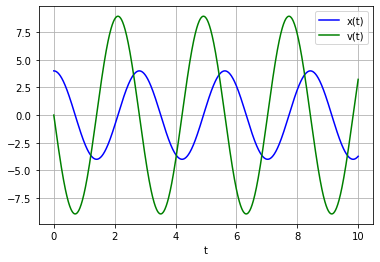

In [21]:
def resorte(f, t, F=0, m=0.2,g=9.8):
    x, y = f
    dfdt = [y, -(x/m)-(F*g)]
    return dfdt
y0 = [4, 0]
t = np.linspace(0, 10, 1000)
sol = odeint(resorte, y0, t)
plt.plot(t, sol[:, 0], 'b', label='x(t)')
plt.plot(t, sol[:, 1], 'g', label='v(t)')
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

In [22]:
#Runge-Kuta de orden 2 
def RK2_step( f, y, t, h, args=()):
    #Creating solutions
    K0 = h*f(t, y, args)
    K1 = h*f(t + 0.5*h, y + 0.5*K0, args)
    y1 = y + K1
    #Returning solution
    return y1

In [23]:
def resorte(t,f,F=0,m=0.2,g=9.8 ):
    x = f[0]
    v = f[1]
    dx = v
    dv = -(x/m)-(F*g)
    return np.array([dx,dv])

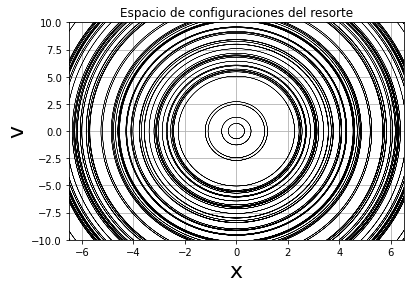

In [28]:
nci = 100
h = 0.01
x0=np.random.random(nci)*10
v0=np.random.random(nci)*10

for xo,vo in zip(x0,v0):
    time=[0]
    x=[xo]
    v=[vo]
    for i,t in zip(range(1000),range(1000)):
        y=[x[i],v[i]]
        xi,vi=RK2_step(resorte,y,t,h,args=(0))
        x.append(xi)
        v.append(vi)
        time.append(t)
    plt.plot(x,v,lw=0.3,color="black")

plt.xlabel("x",fontsize=22)
plt.ylabel("v",fontsize=22)
plt.xlim((-6.5,6.5))
plt.ylim((-10,10))
plt.title("Espacio de configuraciones del resorte");
plt.grid(True)
